In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Step 1: Load Dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [8]:
#Use Elbow Method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

In [9]:
inertia

[1000.0000000000002,
 715.2750473761117,
 574.6285781223221,
 519.1132528974903,
 404.64818327643644,
 354.3966472458641,
 294.8058476285872,
 254.41521729352561,
 227.84632836946236,
 190.34252178715482]

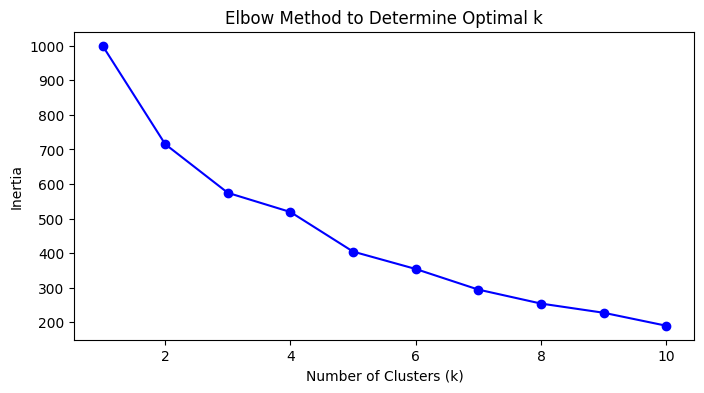

In [10]:
# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [26]:
# Fit KMeans with chosen k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = labels

In [27]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 3, 0, 1, 0, 3, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 1, 1, 3, 1, 1, 4, 3, 4, 3, 4, 3,
       1, 1, 4, 1, 4, 3, 4, 1, 4, 3, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 4, 3, 4, 1, 4, 1, 4, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 3], dtype=int32)

In [28]:
#Evaluate using Silhouette Score
score = silhouette_score(scaled_features, labels)
print("Silhouette Score for k=",optimal_k,":", score)

Silhouette Score for k= 5 : 0.28733914723855114


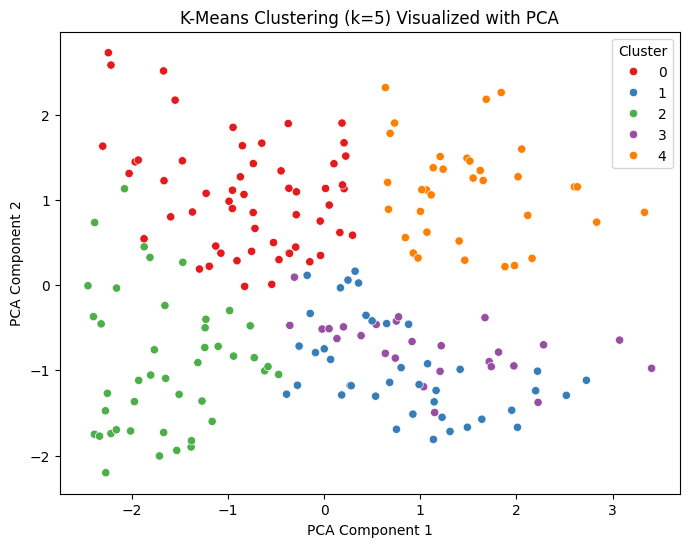

In [29]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette='Set1')
plt.title(f'K-Means Clustering (k={optimal_k}) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()